In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

In [2]:
def label(xy, text):
    y = xy[1] - 0.15 # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family="sans-serif", size=14)

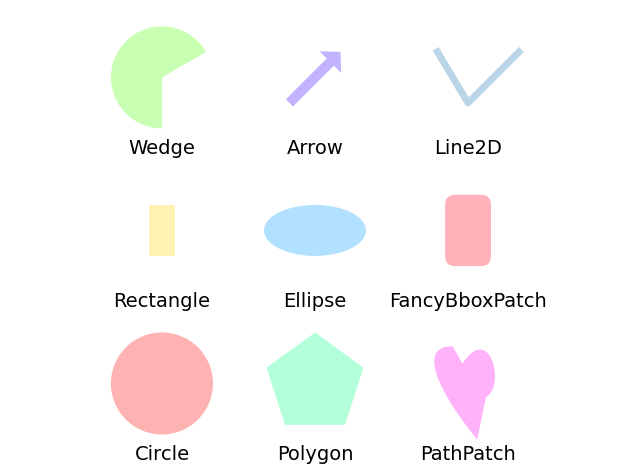

In [3]:
fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, radius=0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1, width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = ([-0.06, 0.0, 0.1], [0.05, -0.05, 0.05])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(colors)
ax.add_collection(collection)
ax.add_line(line)

plt.axis("equal")
plt.axis("off")
plt.tight_layout()

plt.show()